In [9]:
# Generating simulated dataset of 100 students for dropout risk classification
import pandas as pd
import numpy as np
import random

# Seed for reproducibility
random.seed(42)
np.random.seed(42)

# Generate 100 fictitious names
first_names = ['Juan', 'María', 'Luis', 'Ana', 'Camilo', 'Valentina', 'Andrés', 'Laura', 'Diego', 'Sofía',
               'Carlos', 'Daniela', 'Mateo', 'Isabella', 'Julián', 'Gabriela', 'Esteban', 'Sara', 'Tomás', 'Paula']
last_names = ['Pérez', 'Gómez', 'Rodríguez', 'Torres', 'Ríos', 'Ruiz', 'Mejía', 'Sánchez', 'Castro', 'Martínez',
              'Ramírez', 'Moreno', 'López', 'Vargas', 'Castaño', 'Ortega', 'Mendoza', 'Navarro', 'Suárez', 'Herrera']

names = [f"{random.choice(first_names)} {random.choice(last_names)}" for _ in range(100)]

# Participation levels and emotional states
participation_levels = ['Alta', 'Media', 'Baja']
emotional_states = ['Estable', 'Ansioso', 'Desmotivado', 'Estresado']
risk_levels = ['Alto', 'Medio', 'Bajo']

# Sample observations
observations = [
    "Participa activamente en clase.",
    "Muestra señales de distracción.",
    "No entrega tareas a tiempo.",
    "Se nota desmotivado.",
    "Tiene buen desempeño.",
    "Faltas frecuentes.",
    "Aislamiento social.",
    "Excelente actitud.",
    "Dificultad para concentrarse.",
    "No participa en actividades."
]

# Generate realistic data
data = []
for name in names:
    asistencia = np.random.randint(40, 101)
    promedio = round(np.random.uniform(1.0, 5.0), 1)
    participacion = random.choices(participation_levels, weights=[0.3, 0.4, 0.3])[0]
    emocional = random.choices(emotional_states, weights=[0.4, 0.2, 0.2, 0.2])[0]
    observacion = random.choice(observations)

    # Simple logic to assign risk
    if asistencia < 60 or promedio < 3.0 or participacion == 'Baja' or emocional in ['Desmotivado', 'Estresado']:
        riesgo = random.choices(risk_levels, weights=[0.6, 0.3, 0.1])[0]
    elif asistencia > 85 and promedio > 4.0 and participacion == 'Alta' and emocional == 'Estable':
        riesgo = random.choices(risk_levels, weights=[0.05, 0.15, 0.8])[0]
    else:
        riesgo = random.choices(risk_levels, weights=[0.2, 0.5, 0.3])[0]

    data.append([name, asistencia, promedio, participacion, emocional, observacion, riesgo])

# Create DataFrame
df = pd.DataFrame(data, columns=[
    'Nombre', 'Asistencia (%)', 'Promedio académico', 'Participación en clase',
    'Estado emocional', 'Observación docente', 'Riesgo de deserción'
])

# Save to CSV
output_path = "/workspaces/desercion/datos_estudiantes_simulados.csv"
df.to_csv(output_path, index=False)

# Display sample
print(df.head())

          Nombre  Asistencia (%)  Promedio académico Participación en clase  \
0      Ana Pérez              78                 4.2                   Alta   
1  Diego Sánchez              54                 3.9                   Alta   
2     Laura Ríos             100                 3.4                  Media   
3    Ana Navarro              97                 1.6                   Baja   
4    Luis Suárez              50                 2.8                   Baja   

  Estado emocional              Observación docente Riesgo de deserción  
0      Desmotivado             Se nota desmotivado.                Alto  
1          Estable    Dificultad para concentrarse.                Alto  
2          Estable      No entrega tareas a tiempo.                Bajo  
3          Ansioso             Se nota desmotivado.               Medio  
4          Estable  Muestra señales de distracción.               Medio  


In [18]:
# Generating interactive dashboard with Plotly for student risk analysis
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import os

# Load the dataset
file_path = "/workspaces/desercion/datos_estudiantes_simulados.csv"
df = pd.read_csv(file_path)

# Clean column names
df.columns = [col.strip() for col in df.columns]

# Save cleaned data for use in Dash app
cleaned_file_path = "/workspaces/desercion/datos_estudiantes_simulados.csv"
df.to_csv(cleaned_file_path, index=False)

print("Cleaned dataset saved as estudiantes_cleaned.csv for use in interactive dashboard.")


Cleaned dataset saved as estudiantes_cleaned.csv for use in interactive dashboard.


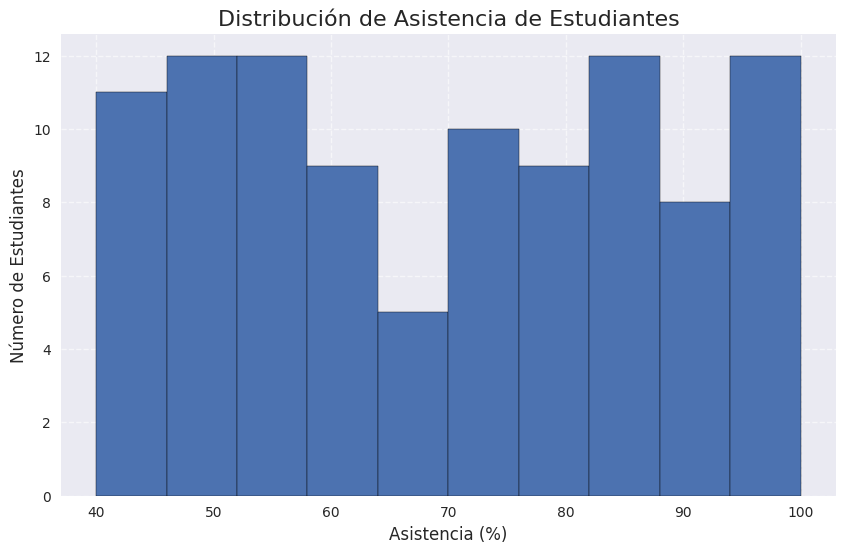

In [24]:
# Generating histogram of student attendance distribution from estudiantes.csv
import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = "/workspaces/desercion/datos_estudiantes_simulados.csv"
df = pd.read_csv(file_path)

# Create histogram of attendance
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.hist(df["Asistencia (%)"], bins=10, color="#4C72B0", edgecolor="black")
plt.title("Distribución de Asistencia de Estudiantes", fontsize=16)
plt.xlabel("Asistencia (%)", fontsize=12)
plt.ylabel("Número de Estudiantes", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

In [28]:
print(df.columns)

Index(['Nombre', 'Asistencia (%)', 'Promedio académico',
       'Participación en clase', 'Estado emocional', 'Observación docente',
       'Riesgo de deserción'],
      dtype='object')


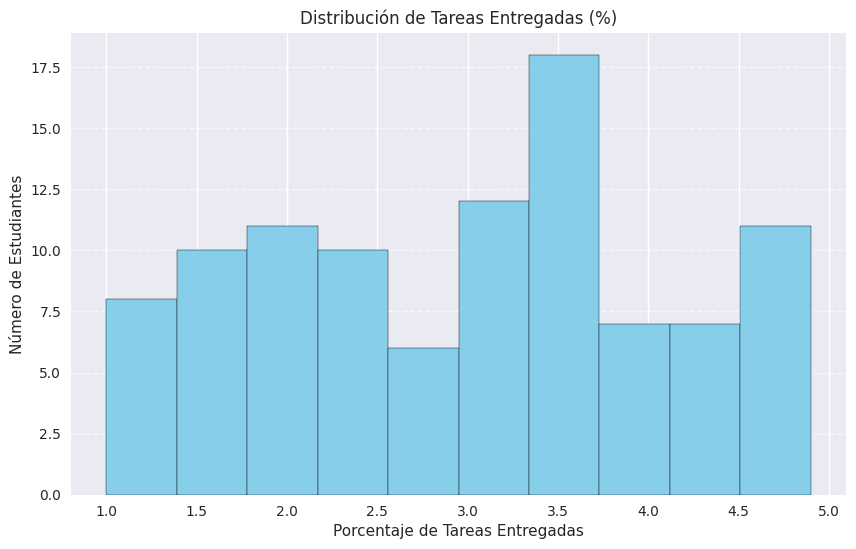

In [29]:
# Generating histogram of task submission percentages from estudiantes.csv

import pandas as pd
import matplotlib.pyplot as plt
import os

# Load the dataset
file_path = "/workspaces/desercion/datos_estudiantes_simulados.csv"
df = pd.read_csv(file_path)

# Create histogram of 'Tareas entregadas (%)'
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.hist(df['Promedio académico'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribución de Tareas Entregadas (%)')
plt.xlabel('Porcentaje de Tareas Entregadas')
plt.ylabel('Número de Estudiantes')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
